#How to avoid over-fitting in CNN keras 

#Using 2 techniques



1.   Modification of the regularization term (l2)
2.   DropOut Modification



##Importing mnist handwritting datasets

In [1]:
%%capture
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

##Visualizing datasets

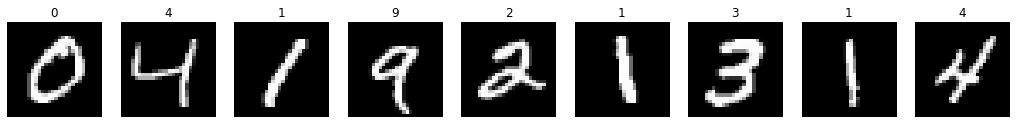

In [2]:
import matplotlib.pyplot as plt

num_imgs = 10
plt.figure(figsize=(num_imgs*2,3))

for i in range(1,num_imgs):
    plt.subplot(1,num_imgs,i).set_title('{}'.format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

##Data normalization
###Converting the data into range of 0 to 1 from 0 to 255

In [3]:
import numpy as np

print('Max = {}\nMin = {}'.format(np.max(x_train), np.min(x_train)))

Max = 255
Min = 0


In [4]:
x_train = x_train/255
x_test = x_test/255

print('Max = {}\nMin = {}'.format(np.max(x_train), np.min(x_train)))

Max = 1.0
Min = 0.0


##One-Hot Encoding
###Making data binary from numbers 

In [5]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


##Model creation
###Create a CNN

In [6]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (28,28)
nclasses = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=50),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()


'''
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 activation_2 (Activation)   (None, 10)                0

"\nmodel = tf.keras.Sequential([\n                             tf.keras.layers.Flatten(input_shape=input_shape),\n                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), \n                             tf.keras.layers.Activation('tanh'),\n                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),\n                             tf.keras.layers.Activation('tanh'),\n                             tf.keras.layers.Dense(units=nclasses), \n                             tf.keras.layers.Activation('sigmoid')\n                             ])\nmodel.summary()\n"

##Model Training
###Optimizer Adam with learning rate 0.0005 

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=True, validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 7s 4ms/step - loss: 0.5258 - accuracy: 0.8640 - val_loss: 0.2747 - val_accuracy: 0.9223
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2427 - accuracy: 0.9301 - val_loss: 0.2171 - val_accuracy: 0.9376
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1877 - accuracy: 0.9458 - val_loss: 0.1714 - val_accuracy: 0.9497
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1530 - accuracy: 0.9546 - val_loss: 0.1493 - val_accuracy: 0.9547
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1288 - accuracy: 0.9620 - val_loss: 0.1356 - val_accuracy: 0.9620
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1102 - accuracy: 0.9679 - val_loss: 0.1283 - val_accuracy: 0.9615
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0952 - accuracy: 0.9719 - val_loss: 0.1129 - val_accuracy: 0.9659
Epoch 

###Visualization of the loss and accuracy

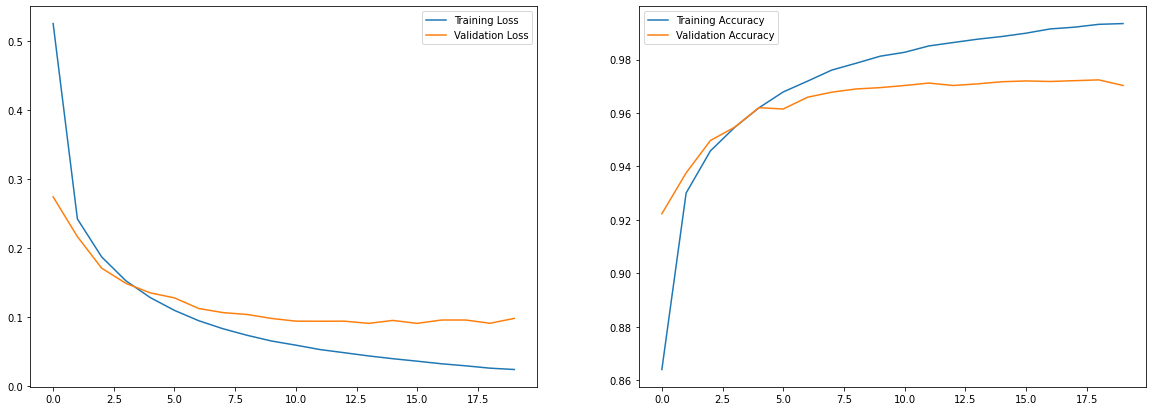

In [8]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

##Modification of the regularization term (l2)

In [9]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (28,28)
nclasses = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history_reg = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=True, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 activation_2 (Activation)   (None, 10)                0

###Visualization of l2 results

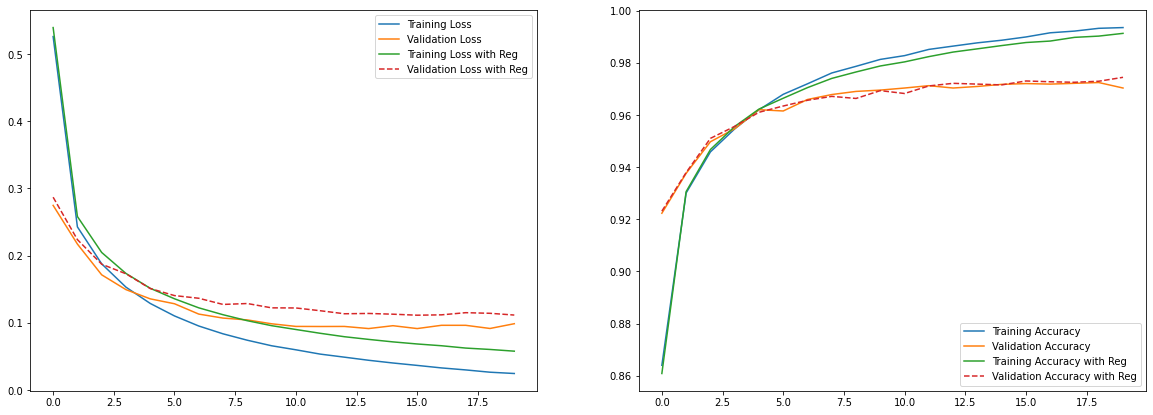

In [10]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.plot(tf_history_reg.history['loss'], label='Training Loss with Reg')
plt.plot(tf_history_reg.history['val_loss'], label='Validation Loss with Reg', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(tf_history_reg.history['accuracy'], label='Training Accuracy with Reg')
plt.plot(tf_history_reg.history['val_accuracy'], label='Validation Accuracy with Reg', linestyle='--')
plt.legend()
plt.show()

##DropOut Modification


In [11]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

input_shape = (28,28)
nclasses = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(units=50), 
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units=50),
                             tf.keras.layers.Activation('tanh'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units=nclasses), 
                             tf.keras.layers.Activation('sigmoid')
                             ])
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
tf_history_dp = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=True, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

###Visualization of the DropOut Technique

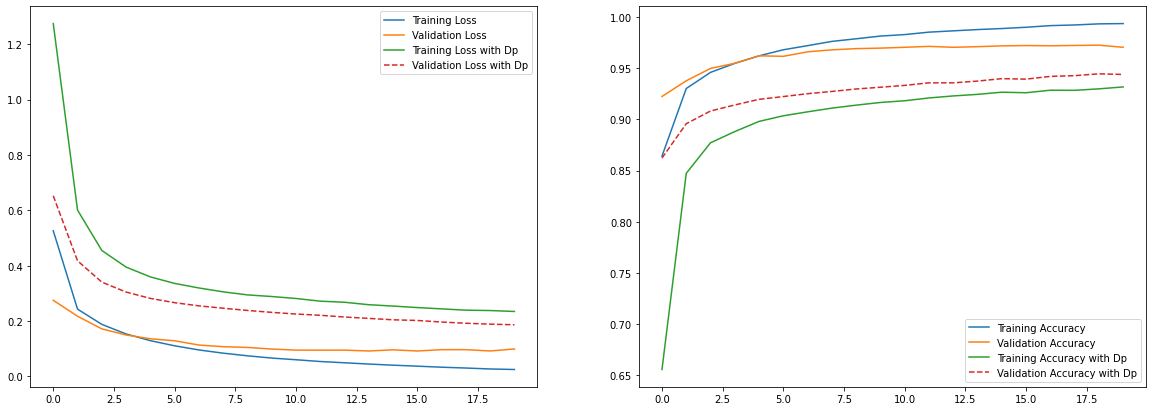

In [12]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.plot(tf_history_dp.history['loss'], label='Training Loss with Dp')
plt.plot(tf_history_dp.history['val_loss'], label='Validation Loss with Dp', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(tf_history_dp.history['accuracy'], label='Training Accuracy with Dp')
plt.plot(tf_history_dp.history['val_accuracy'], label='Validation Accuracy with Dp', linestyle='--')
plt.legend()
plt.show()

##Modification of early stopping 

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

model = Sequential([
    Flatten(input_shape=(28, 28)),    # reshape 28 row * 28 column data to 28*28 rows
    Dense(256, activation='sigmoid'), # dense layer 1
    Dropout(0.2), # DropOut 20% on dense layer 1
    Dense(128, activation='sigmoid'), # dense layer 2
    Dropout(0.1), # DropOut 10% on dense layer 2
    Dense(10, activation='softmax'),  # dense layer 3
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)] # Early Stopping
tf_history = model.fit(x_train, y_train, epochs=20, 
          batch_size=2000, validation_split = 0.2, callbacks=callbacks)

Epoch 1/20
24/24 [==============================] - 1s 15ms/step - loss: 2.1052 - accuracy: 0.3273 - val_loss: 1.7341 - val_accuracy: 0.6934
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 1.4469 - accuracy: 0.6567 - val_loss: 1.0522 - val_accuracy: 0.8019
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 0.9266 - accuracy: 0.7785 - val_loss: 0.6791 - val_accuracy: 0.8593
Epoch 4/20
24/24 [==============================] - 0s 8ms/step - loss: 0.6583 - accuracy: 0.8391 - val_loss: 0.5024 - val_accuracy: 0.8878
Epoch 5/20
24/24 [==============================] - 0s 10ms/step - loss: 0.5235 - accuracy: 0.8667 - val_loss: 0.4109 - val_accuracy: 0.8987
Epoch 6/20
24/24 [==============================] - 0s 8ms/step - loss: 0.4460 - accuracy: 0.8826 - val_loss: 0.3573 - val_accuracy: 0.9073
Epoch 7/20
24/24 [==============================] - 0s 8ms/step - loss: 0.3970 - accuracy: 0.8928 - val_loss: 0.3235 - val_accuracy: 0.9128
Epoch 8/20
24/24 [

###Visualization of the EarlyStoping Technique

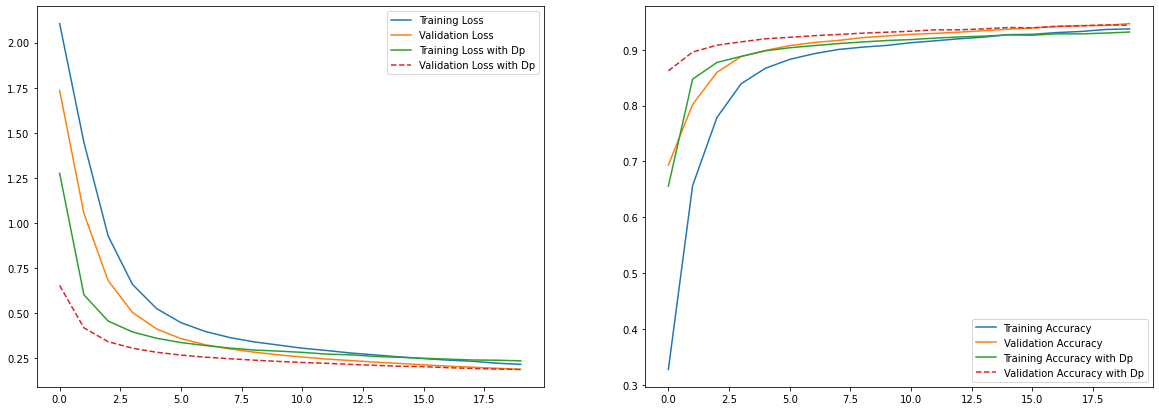

In [16]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(tf_history.history['loss'], label='Training Loss')
plt.plot(tf_history.history['val_loss'], label='Validation Loss')
plt.plot(tf_history_dp.history['loss'], label='Training Loss with Dp')
plt.plot(tf_history_dp.history['val_loss'], label='Validation Loss with Dp', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['accuracy'], label='Training Accuracy')
plt.plot(tf_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(tf_history_dp.history['accuracy'], label='Training Accuracy with Dp')
plt.plot(tf_history_dp.history['val_accuracy'], label='Validation Accuracy with Dp', linestyle='--')
plt.legend()
plt.show()